## Regresión Lineal

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_regression
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
!dir

AED.ipynb		 caso_hr_analytics_ibm	  test.ipynb
Regresion\ Lineal.ipynb  hr_analystics_IBM.ipynb
caso\ telco		 mun_cbba


In [3]:
municipios = pd.read_csv('mun_cbba/Mun_Cbba2.csv', sep=';', decimal=',')

In [4]:
municipios.head()

,mun,idh,ip,vivp,vdef,pvde,pob,purb,tmi,anfe,pagr,ganf,gip,gidh,gvde,gpob,gtmi,gpag,gurb
0,1,0.741,33.8,123477,6603,5.347555,517024,99.934046,53,8.5,3.8,1,1,4,1,4,1,1,4
1,2,0.516,83.6,6118,3616,59.104282,26281,28.084928,86,40.4,55.8,3,3,3,3,3,3,3,2
2,3,0.532,88.5,1099,708,64.422202,4659,0.000000,66,33.0,67.7,2,4,3,3,1,2,3,1
3,4,0.541,85.5,1394,791,56.743185,6071,0.000000,68,32.1,76.6,2,3,3,3,1,2,4,1
4,5,0.414,97.5,6398,5316,83.088465,26825,7.507922,106,57.2,80.3,4,4,2,4,3,4,4,1


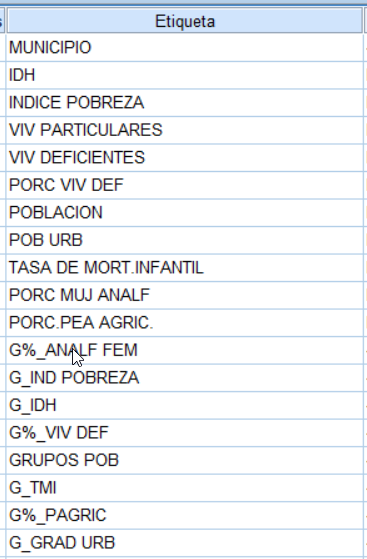

In [5]:
municipios.dtypes

mun       int64
idh     float64
ip      float64
vivp      int64
vdef      int64
pvde    float64
pob       int64
purb    float64
tmi       int64
anfe    float64
pagr    float64
ganf      int64
gip       int64
gidh      int64
gvde      int64
gpob      int64
gtmi      int64
gpag      int64
gurb      int64
dtype: object

### **Paso 1**  Establecimiento de objetivos y/o hipótesis

La mortalidad infantil disminuye con el mejoramiento de las condiciones de vida y con el aumento del nivel educacional de las madres

$$
\text{TMI} = \theta_0 + \theta_1 \cdot \text{IP} + \theta_2 \cdot \text{anfe}
$$

### **Paso 2** Desarrollo del plan de analisis

Tamaño de muestra
Selección del metodo de estimacion:  Minimos Cuadrados o Gradiente descendiente


In [6]:
modelo = smf.ols(formula="tmi ~ ip + anfe", data=municipios).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tmi   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     57.61
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.23e-12
Time:                        02:11:09   Log-Likelihood:                -167.23
No. Observations:                  44   AIC:                             340.5
Df Residuals:                      41   BIC:                             345.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4323      6.354      4.947      0.0

### **Paso 3** Verificación de las condiciones de aplicabilidad del analisis de regresión

Normalidad de los residuos

Graficamente: Gráfico Q-Q
Analiticamente:Shapiro-Wilk

In [7]:
residuos = modelo.resid

In [8]:
residuos.head()

0     5.952726
1    -2.923633
2   -16.780832
3   -13.253130
4    -2.301713
dtype: float64

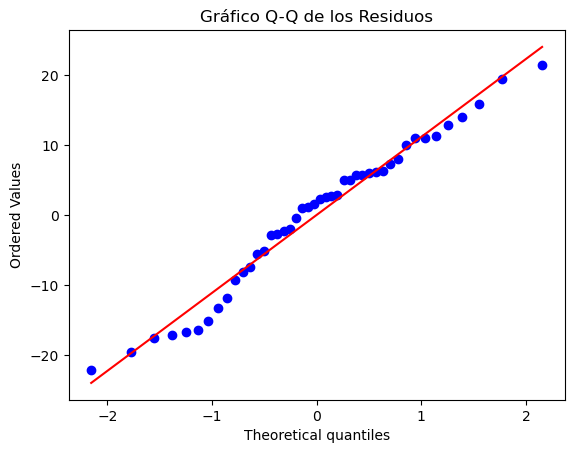

In [9]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los Residuos")
plt.show()


In [10]:
stat, p_value = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p_value)


Estadístico de Shapiro-Wilk: 0.9704869101509311
p-value: 0.314836115641427


A una significancia de 5% no se rechaza la hipotesis nula por lo que sigue una distribucion normal

### **Paso 4** Estimacion y evaluación del modelo 

In [11]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tmi   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     57.61
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.23e-12
Time:                        02:11:54   Log-Likelihood:                -167.23
No. Observations:                  44   AIC:                             340.5
Df Residuals:                      41   BIC:                             345.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4323      6.354      4.947      0.0

Del resultado el modelo considerando los coeficientes se obtiene que el modelo es:
$$
\text{TMI} = 31.432 + 0.217 \cdot \text{IP} + 0.974 \cdot \text{anfe}
$$

Se realiza una evaluación teórica.

Se planteó que las condiciones de vida y el grado de urbanización implicaban un impacto sobre la mortalidad infantil:

a) Mayor tasa de analfabetismo femenino (anfe) implica una mayor tasa de mortalidad infantil. El signo del coeficiente debe ser positivo. En el modelo estimado, el coeficiente de anfe anfe es  1.3292 1.3292, lo cual es consistente con la teoría. Este coeficiente es estadísticamente significativo ( 𝑝 < 0.001 p<0.001), lo que indica que existe evidencia empírica para concluir que el analfabetismo femenino tiene un impacto positivo y significativo sobre la mortalidad infantil.

b) Mayor porcentaje de población urbana (purb) implica una mayor tasa de mortalidad infantil. El signo del coeficiente también debe ser positivo. En el modelo estimado, el coeficiente de purb purb es  0.0505 0.0505, pero este valor no es estadísticamente significativo ( 𝑝 = 0.588 > 0.05 p=0.588>0.05). Esto sugiere que no hay evidencia empírica suficiente para concluir que el grado de urbanización afecta significativamente la mortalidad infantil.

El modelo estimado constituye una evidencia empírica parcial de la teoría planteada en el primer paso: mientras que el analfabetismo femenino demuestra ser un factor significativo, el grado de urbanización no tiene un impacto concluyente en este caso.



##### i) Evaluacion de la bondad de ajuste

Se puede usar el coeficiente de correlacion R y el coeficiente de determinacion$$R^2$$ 

El coeficiente de determinación se puede usar como una medida de bondad de ajuste. El coeficiente mide la proporcion de la variacion total (en este caso de la mortalidad infantil) explicada por la recta de regresion estimada, el valor puede ser entre 0 y 1. Cuanto mas cerca a 1 entonces se tiene un mejor ajuste de los datos a la recta estimada.

En este ejemplo el indicador es 0.738 que significa que el 73.8% de la variabilidad de la mortalidad infantil esta explicada por la asociación lineal con el analfabetismo femenino  la incidencia de la pobreza y el restante 26.2% de debe a otros factores.

##### ii) Pruebas de significancia estadistica

Prueba de significancia de los coeficientes. Para cada coeficiente se hace la prueba de hipotesis:

a) Definir hipotesis

Ho: El coeficiente es significativamente cero

H1: El coeficiente es significativamente diferente de cero

b) Definir region critica

0.05

c) aplicar estadistico que en este caso sera encontrar el p value

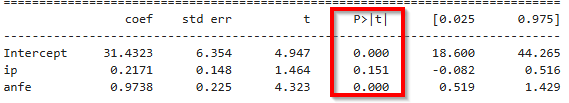

d) realizar la prueba si el p-valor es menor al valor de la region crítica se rechaza la hipotesis nula por lo que no es normal. En caso contrario se acepta la normalidad

Se concluye que solo la tasa de analfabetismo femenino es estadísticamente significativo. En tanto que el indice de pobreza no es estadisticamente significativo, por lo que no tienen influencia sobre la mortalidad infantil.




##### iii) Prueba de significacion global

Aplicación del analisis de varianza (ANOVA)

a) Definir hipotesis

Ho: Theta 0 = theta 1 = theta 2 = 0 (No existe relacion lineal)

H1: Por lo menos un coeficiente es diferente de cero (Existe relacion lineal)

b) Definir region critica

0.05

c) aplicar estadistico que en este caso sera encontrar el p value


In [46]:
# Prueba ANOVA

# Obtener la tabla ANOVA para el modelo con tipo II
anova_table = anova_lm(modelo, typ=1)

# Calcular la suma de cuadrados total
sst = anova_table['sum_sq'].sum()  # Suma total de cuadrados

# Extraer la suma de cuadrados de regresión (sin incluir el Residual)
ssr = anova_table['sum_sq'].sum() - anova_table.loc['Residual', 'sum_sq']
sse = anova_table.loc['Residual', 'sum_sq']  # Suma de cuadrados del error

# Grados de libertad
df_model = anova_table['df'].sum() - anova_table.loc['Residual', 'df']  # Grados de libertad del modelo
df_resid = anova_table.loc['Residual', 'df']  # Grados de libertad de los residuos
df_total = df_model + df_resid  # Grados de libertad total

# Media cuadrática
msr = ssr / df_model  # Media de cuadrados de la regresión
mse = sse / df_resid  # Media de cuadrados de los residuos

# Estadístico F y valor p para el modelo completo
f_stat = msr / mse
p_value = modelo.f_pvalue  # Valor p para el modelo completo

# Crear la tabla ANOVA en el formato deseado
anova_custom_table = pd.DataFrame({
    'Fuente de Variación': ['Regresión', 'Residual', 'Total'],
    'Suma de Cuadrados': [ssr, sse, sst],
    'Grados de Libertad': [df_model, df_resid, df_total],
    'Media Cuadrática': [msr, mse, None],
    'F': [f_stat, None, None],
    'Sig.': [p_value, None, None]
})

# Mostrar la tabla ANOVA en el formato deseado
anova_custom_table.head()

,Fuente de Variación,Suma de Cuadrados,Grados de Libertad,Media Cuadrática,F,Sig.
0,Regresión,14487.450190,2.0,7243.725095,57.607428,1.232427e-12
1,Residual,5155.458901,41.0,125.742900,NaN,NaN
2,Total,19642.909091,43.0,NaN,NaN,NaN


d) realizar la prueba si el p-valor es menor al valor de la region crítica se rechaza la hipotesis nula por lo que no es normal. En caso contrario se acepta la Ho de que no existe relacion lineal

Al rechazar la hipotesis nula, que implica que al menos uno de los coeficientes es distinto de cero en consecuencia se puede concluir que existe asociación lineal entre las variables consideradas

##### iv) Varianza constante

Parece que no se cumple el supuesto de homocedasticidad (varianza igual) en el caso de la variable Indice de pobreza puesto que los errores se incrementan a medida que aumentan los valores de la variable. El mejor caso seria obtener un resultado como el generado para la variable tasa de analfabetismo.

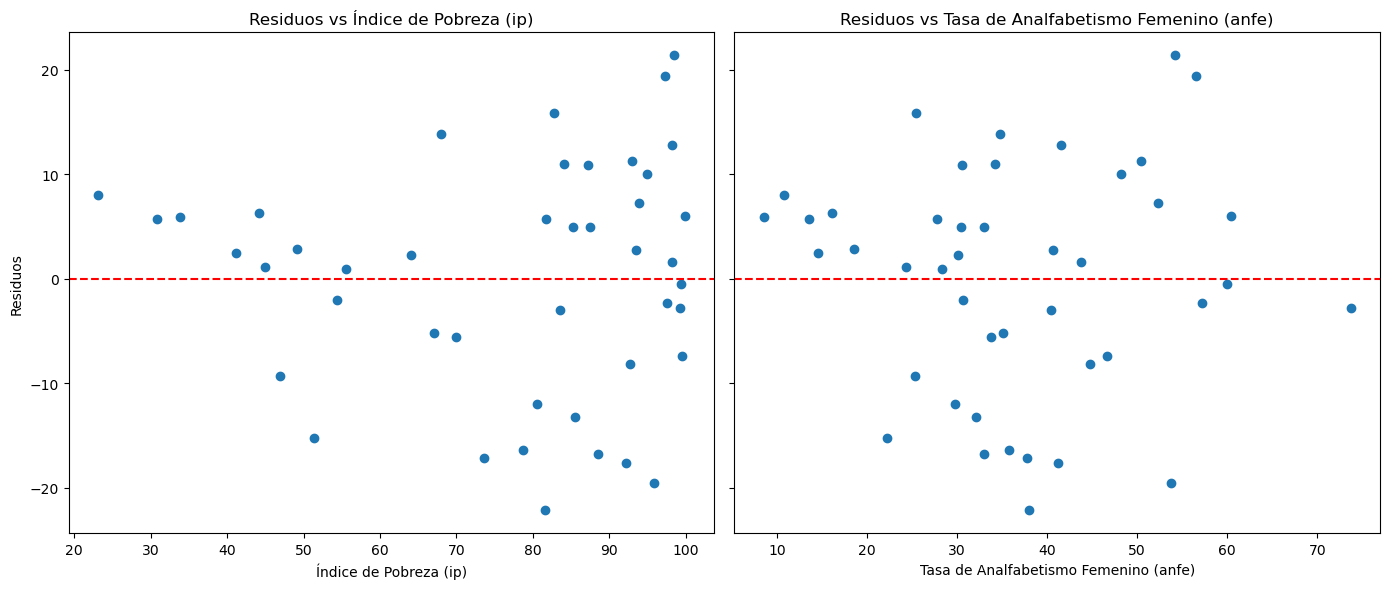

In [49]:
# Obtener los residuos del modelo
residuos = modelo.resid

# Graficar los residuos contra cada variable independiente
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico de residuos vs. 'ip'
axes[0].scatter(municipios['ip'], residuos)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel("Índice de Pobreza (ip)")
axes[0].set_ylabel("Residuos")
axes[0].set_title("Residuos vs Índice de Pobreza (ip)")

# Gráfico de residuos vs. 'anfe'
axes[1].scatter(municipios['anfe'], residuos)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel("Tasa de Analfabetismo Femenino (anfe)")
axes[1].set_title("Residuos vs Tasa de Analfabetismo Femenino (anfe)")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### **Paso 5** Interpretación del modelo 

Una vez que se ha evaluado el modelo, especialmente en lo que se refiere al cumplimiento de las condiciones de aplicabilidad del modelo, recién se puede interpretar el modelo y utilizarlo de acuerdo al objetivo planteado inicialmente

$$
\text{TMI} = 31.432 + 0.217 \cdot \text{IP} + 0.974 \cdot \text{anfe}
$$

**Interpretación de los coeficientes**

El valor estimado de 31.432 se puede interpretar como la tasa de mortalidad infantil media de los municipios cuando el porcentaje de hogares pobres es 0 y el analfabetismo femenino es 0.  O tambien se puede decir que es la tasa de mortalidad infantil media independientemente de la incidencia de la pobresa y  el analfabetismo femenino. En otras palabras se producirá en promedio 31 defunciones de menores de un año por cada mil nacidos vivos independientemente de la incidencia de la pobreza y del analfabetismo femenino

De la estimación de los coeficientes se puede interpretar que cuando el porcentaje de hogares pobres aumenta en 1%, la tasa de mortalidad infantil aumentará en 0.217 defunciones de menores de un año por cada mil nacidos vivos. Cuando el analfabetismo femenino auente en un 1% la TMI aumentara en promedio 0.974 por mil.

### **Paso 6** Validación de los resultados

Lo que queda por hacer es validar la generalidad del modelo y por tanto de las teorías que intenta probar. Para ello se pueden comparar los resultados del estudio con otros estudios previos en las mismas áreas geográficas, si éstos son posibles. Se puede efectuar una validación empírica de tipo predictivo, es decir, tomar la ecuación estimada en otro año y, para un conjunto de observaciones, se cuenta con un nuevo conjunto de observaciones para comparar los resultados obtenidos.